In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from format_io import h5_to_df

from akita_utils.seq_gens import split_concat_to_integers, split_concat_to_strings

2023-01-03 08:43:44.745660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2023-01-03 08:43:44.745692: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def average_over_targets(dataframe, stat, mouse=True, model=1):
    
    num_targets = 6
    if not mouse:
        num_targets = 5
    
    collist = [stat + f"_h{int(mouse)}_m{model}_t{i}" for i in range(num_targets)]
    
    dataframe[f"{stat}_average"] = dataframe[collist].mean(axis=1)
    
    return dataframe

In [3]:
path = "./15VS15strong/scd.h5"
scd_stats=["SCD"]

In [4]:
df = h5_to_df(path, scd_stats, drop_duplicates_key=None)

In [5]:
df = average_over_targets(df, "SCD")

In [6]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average
0,39.78125,31.703125,45.03125,45.84375,43.46875,42.00000,1,"chr2,chr2","48886271,48886271",0,"53.6875,53.6875",>>,90,"48886252,48886252","-,-",41.31250
1,46.18750,43.062500,46.09375,45.18750,47.15625,43.96875,1,"chr2,chr12","48886271,35192378",0,"53.6875,53.65625",>>,90,"48886252,35192359","-,-",45.25000
2,44.68750,40.062500,45.46875,45.12500,45.90625,43.28125,1,"chr2,chr8","48886271,102781131",0,"53.6875,53.5",>>,90,"48886252,102781112","-,-",44.09375
3,54.93750,58.031250,56.37500,53.31250,57.96875,50.59375,1,"chr2,chr5","48886271,49962010",0,"53.6875,53.3125",>>,90,"48886252,49961991","-,-",55.21875
4,46.50000,44.906250,47.46875,45.87500,48.59375,44.78125,1,"chr2,chr9","48886271,26776375",0,"53.6875,53.125",>>,90,"48886252,26776356","-,-",46.37500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,87.00000,103.687500,100.12500,94.81250,99.31250,80.50000,3,"chr13,chr11","19698921,57467973",30,"51.9375,52.375",>>,60,"19698902,57467954","+,-",94.25000
20921,88.06250,105.500000,106.25000,100.43750,103.31250,83.50000,3,"chr13,chr4","19698921,70621553",30,"51.9375,52.28125",>>,60,"19698902,70621534","+,-",97.81250
20922,83.18750,98.937500,95.06250,89.81250,94.68750,76.75000,3,"chr13,chr2","19698921,101905971",30,"51.9375,52.25",>>,60,"19698902,101905952","+,+",89.75000
20923,89.31250,106.812500,106.25000,100.62500,103.93750,84.12500,3,"chr13,chr16","19698921,13117421",30,"51.9375,51.9375",>>,60,"19698902,13117402","+,+",98.50000


In [7]:
df["core_start"] = df["start"].apply(lambda x: x.split(",")[0])
df["flank_start"] = df["start"].apply(lambda x: x.split(",")[1])

In [8]:
df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_index,chrom,end,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,SCD_average,core_start,flank_start
0,39.78125,31.703125,45.03125,45.84375,43.46875,42.00000,1,"chr2,chr2","48886271,48886271",0,"53.6875,53.6875",>>,90,"48886252,48886252","-,-",41.31250,48886252,48886252
1,46.18750,43.062500,46.09375,45.18750,47.15625,43.96875,1,"chr2,chr12","48886271,35192378",0,"53.6875,53.65625",>>,90,"48886252,35192359","-,-",45.25000,48886252,35192359
2,44.68750,40.062500,45.46875,45.12500,45.90625,43.28125,1,"chr2,chr8","48886271,102781131",0,"53.6875,53.5",>>,90,"48886252,102781112","-,-",44.09375,48886252,102781112
3,54.93750,58.031250,56.37500,53.31250,57.96875,50.59375,1,"chr2,chr5","48886271,49962010",0,"53.6875,53.3125",>>,90,"48886252,49961991","-,-",55.21875,48886252,49961991
4,46.50000,44.906250,47.46875,45.87500,48.59375,44.78125,1,"chr2,chr9","48886271,26776375",0,"53.6875,53.125",>>,90,"48886252,26776356","-,-",46.37500,48886252,26776356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,87.00000,103.687500,100.12500,94.81250,99.31250,80.50000,3,"chr13,chr11","19698921,57467973",30,"51.9375,52.375",>>,60,"19698902,57467954","+,-",94.25000,19698902,57467954
20921,88.06250,105.500000,106.25000,100.43750,103.31250,83.50000,3,"chr13,chr4","19698921,70621553",30,"51.9375,52.28125",>>,60,"19698902,70621534","+,-",97.81250,19698902,70621534
20922,83.18750,98.937500,95.06250,89.81250,94.68750,76.75000,3,"chr13,chr2","19698921,101905971",30,"51.9375,52.25",>>,60,"19698902,101905952","+,+",89.75000,19698902,101905952
20923,89.31250,106.812500,106.25000,100.62500,103.93750,84.12500,3,"chr13,chr16","19698921,13117421",30,"51.9375,51.9375",>>,60,"19698902,13117402","+,+",98.50000,19698902,13117402


In [9]:
df_grouped = df.groupby(["core_start", "flank_start", "flank_bp"]).agg({"SCD_average": "mean"}).reset_index()

In [10]:
df_grouped

,core_start,flank_start,flank_bp,SCD_average
0,101261721,101261721,0,45.84375
1,101261721,101261721,1,45.21875
2,101261721,101261721,2,46.93750
3,101261721,101261721,3,47.31250
4,101261721,101261721,4,47.84375
...,...,...,...,...
6970,70621534,70621534,26,77.93750
6971,70621534,70621534,27,75.00000
6972,70621534,70621534,28,74.87500
6973,70621534,70621534,29,71.37500


In [20]:
all_starts = list(df_grouped.core_start.unique())
all_names = [f"motif {i}" for i in range(len(all_starts))]

In [23]:
dict_of_names = dict(zip(all_starts, all_names))

In [14]:
x = [x for x in range(31)]

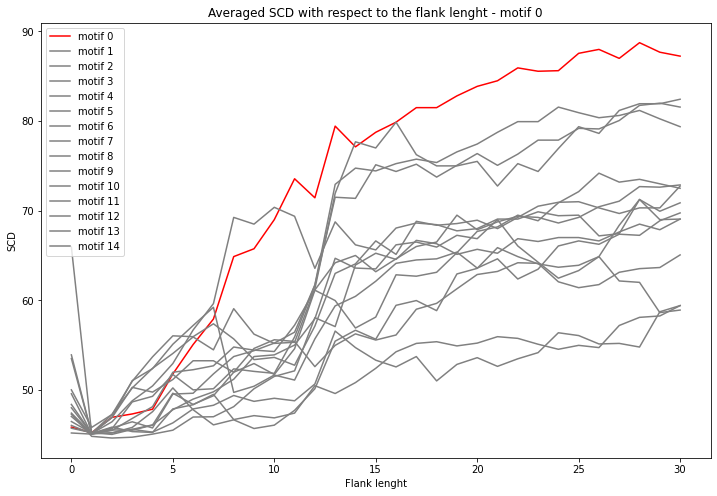

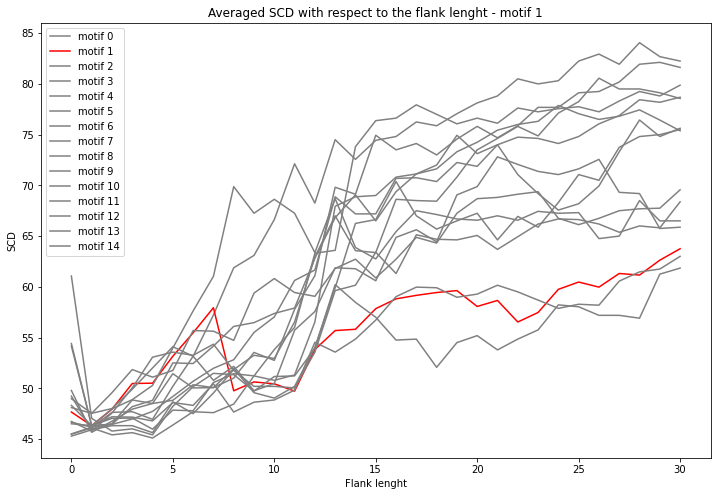

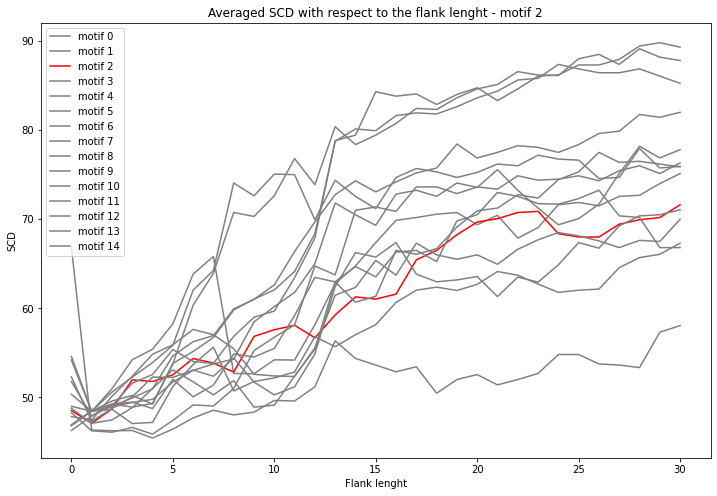

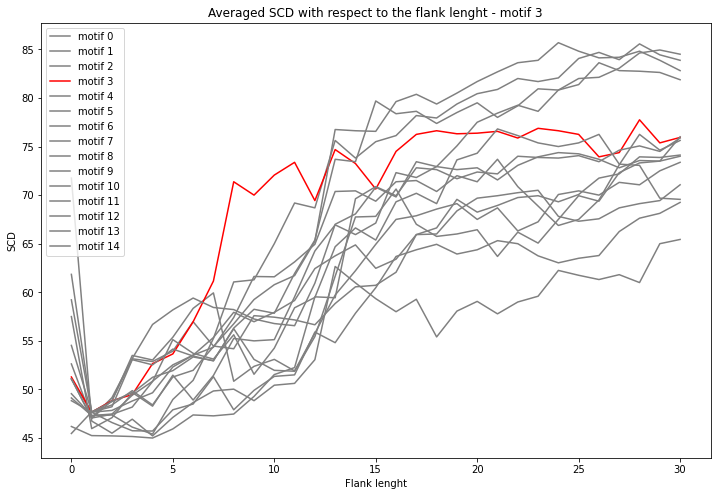

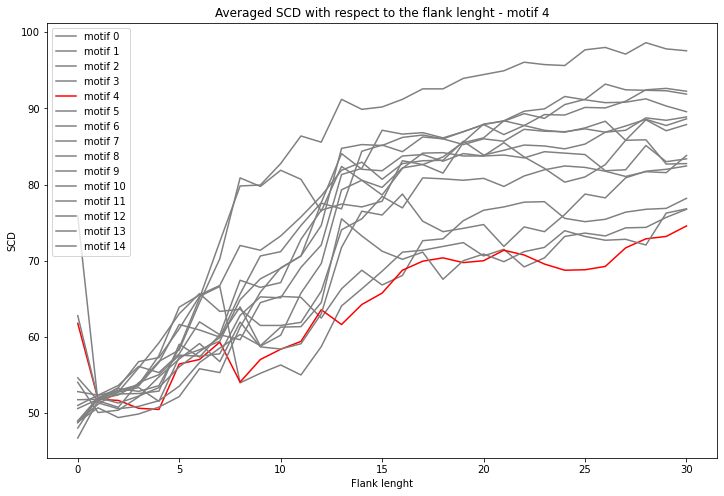

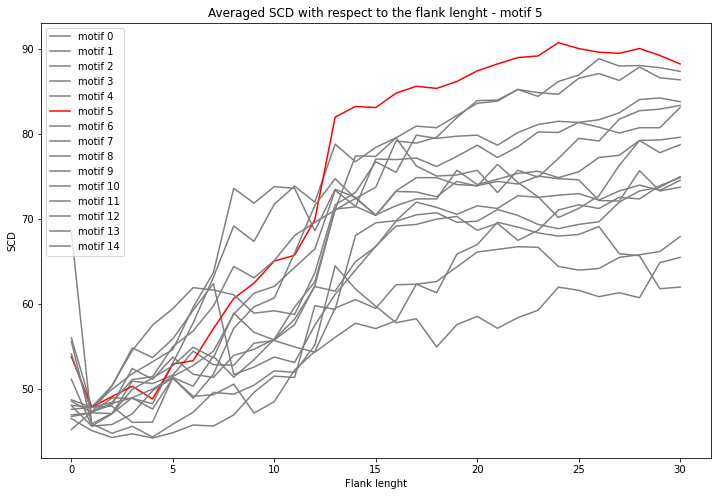

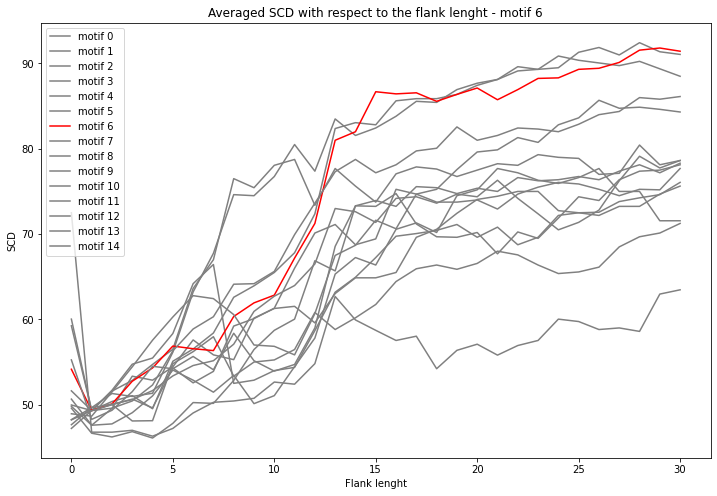

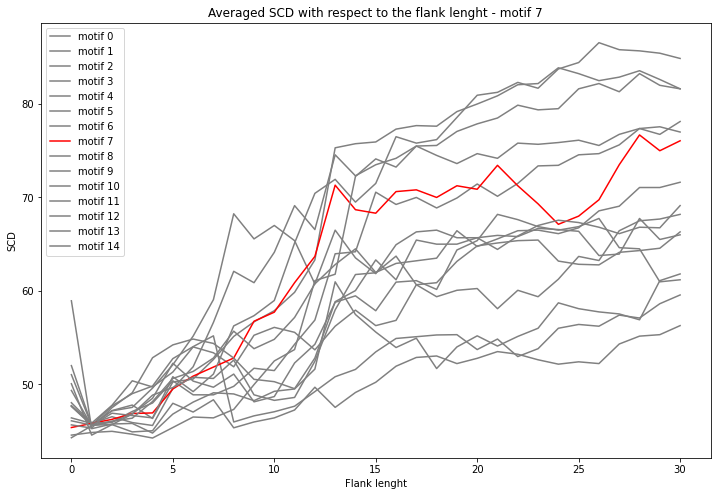

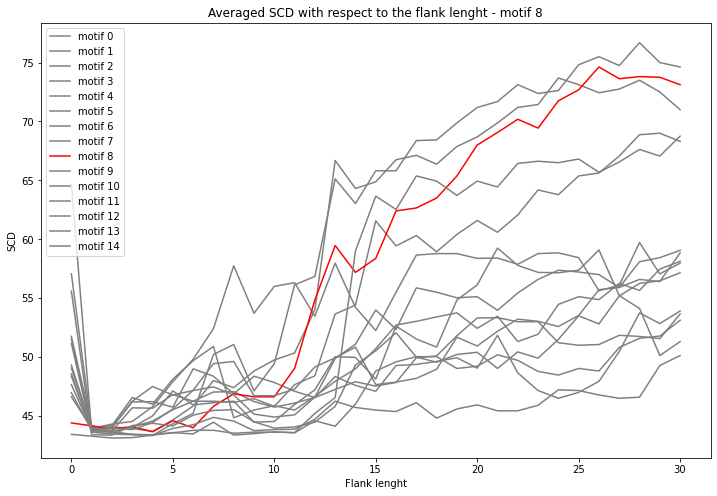

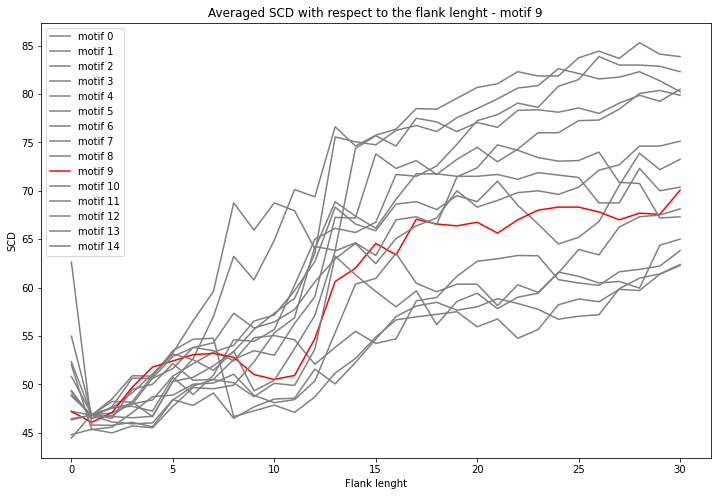

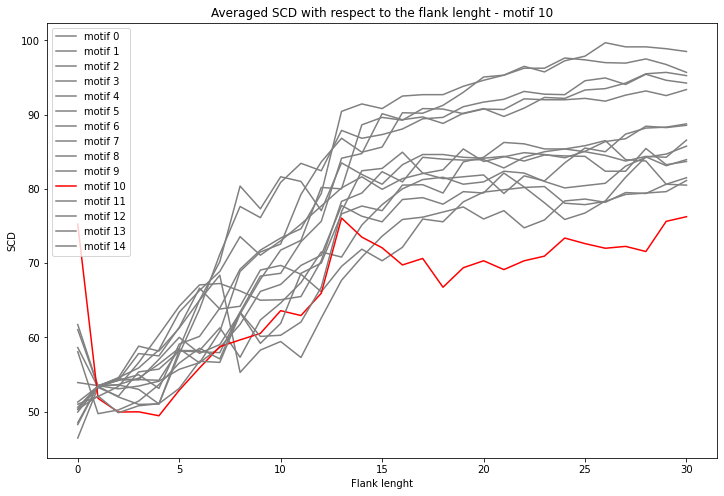

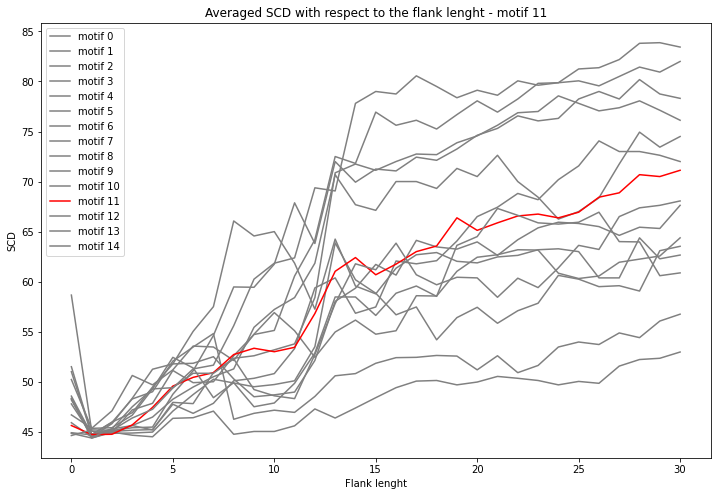

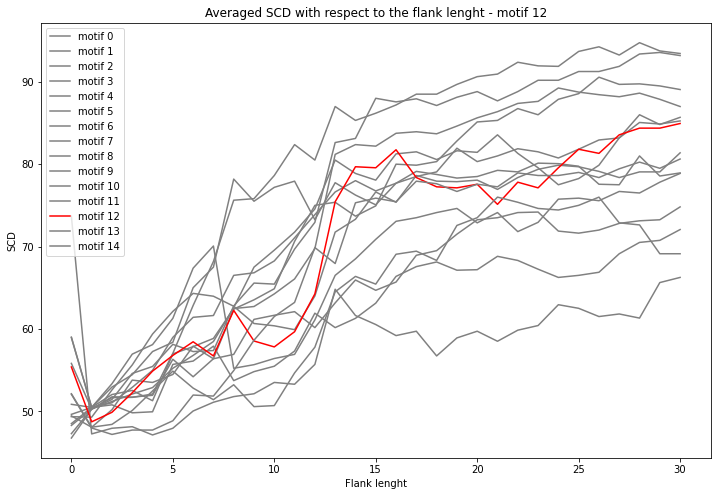

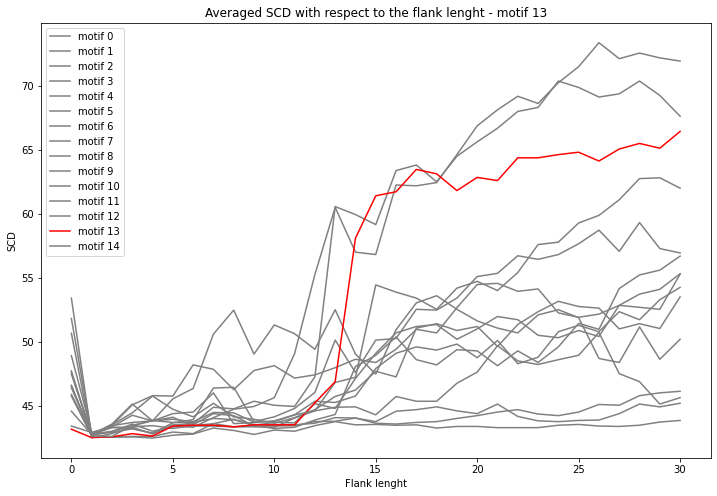

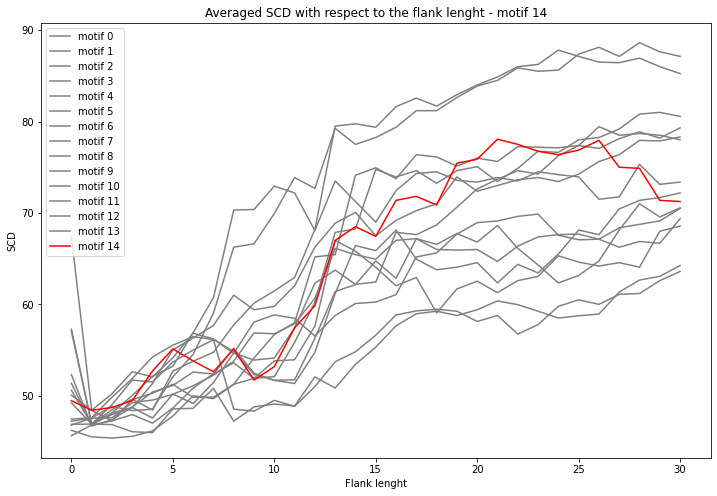

In [25]:
for core_start in df_grouped.core_start.unique():
    
    plt.figure(figsize=(12,8))
    
    for flank_start in df_grouped.flank_start.unique():
    
        if core_start == flank_start:
            plt.plot(x, 
                     df_grouped[(df_grouped["core_start"] == core_start) & (df_grouped["flank_start"] == flank_start)]["SCD_average"], 
                     color="red", label=dict_of_names[core_start])
        else:
            plt.plot(x, 
                     df_grouped[(df_grouped["core_start"] == core_start) & (df_grouped["flank_start"] == flank_start)]["SCD_average"], 
                     color="grey", label=dict_of_names[flank_start])
    
    plt.title("Averaged SCD with respect to the flank lenght - " + dict_of_names[core_start])
    plt.xlabel("Flank lenght")
    plt.ylabel("SCD")
    plt.legend(loc="upper left")


In [44]:
twentyfive_values = df_grouped[df_grouped["flank_bp"] == 25].reset_index()

In [45]:
twentyfive_values

,index,core_start,flank_start,flank_bp,SCD_average
0,25,101261721,101261721,25,87.56250
1,56,101261721,101905952,25,66.62500
2,87,101261721,102781112,25,61.40625
3,118,101261721,13117402,25,69.50000
4,149,101261721,19698902,25,54.96875
...,...,...,...,...,...
220,6845,70621534,49961991,25,64.62500
221,6876,70621534,51152589,25,74.25000
222,6907,70621534,57467954,25,68.12500
223,6938,70621534,58566264,25,77.37500


In [66]:
summary_matrix = np.zeros((len(all_starts), (len(all_starts))))

In [67]:
test = twentyfive_values[twentyfive_values["core_start"] == "101261721"]["SCD_average"].values

In [69]:
counter = 0

for core_start in df_grouped.core_start.unique():
    summary_matrix[counter] += twentyfive_values[twentyfive_values["core_start"] == core_start]["SCD_average"].values
    counter += 1
    

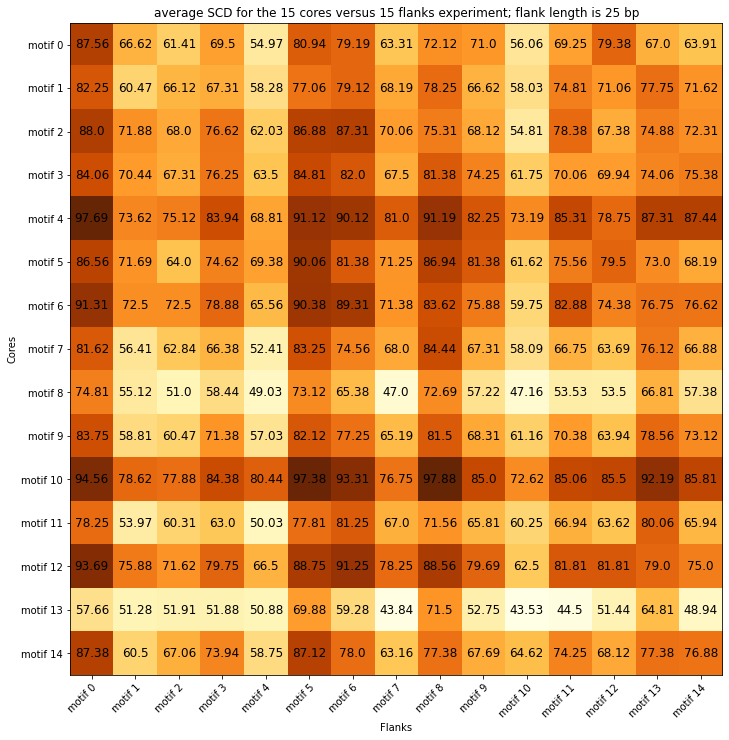

In [94]:
fig, ax = plt.subplots()
im = ax.imshow(summary_matrix, cmap="YlOrBr")

fig.set_figheight(12)
fig.set_figwidth(12)

ax.set_xticks(np.arange(len(all_names)), labels=all_names)
ax.set_yticks(np.arange(len(all_names)), labels=all_names)

ax.set_ylabel('Cores')
ax.set_xlabel('Flanks')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(all_names)):
    for j in range(len(all_names)):
        text = ax.text(j, i, round(summary_matrix[i, j], 2),
                       ha="center", va="center", color="black", fontsize=12)


ax.set_title("average SCD for the 15 cores versus 15 flanks experiment; flank length is 25 bp")
# fig.tight_layout()

# plt.savefig("15vs15_matplot.png")
plt.show()
